# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2264a94ac9a628d0057660fd7802ef96
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wewak
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | dehri
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | singtam
Processing Record 7 of Set 1 | lusambo
Processing Record 8 of Set 1 | muravlenko
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | huamachuco
Processing Record 11 of Set 1 | berezovyy
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | lhokseumawe
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | chonchi
Processing Record 16 of Set 1 | khandyga
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | nikol'sk
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | blackmans bay
Processing Record 2

Processing Record 36 of Set 4 | tekkali
Processing Record 37 of Set 4 | hermanus
Processing Record 38 of Set 4 | karasburg
Processing Record 39 of Set 4 | boyolangu
Processing Record 40 of Set 4 | kristiansund
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | thanh hoa
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | fale old settlement
Processing Record 45 of Set 4 | pemalang
Processing Record 46 of Set 4 | yorkton
Processing Record 47 of Set 4 | neiafu
Processing Record 48 of Set 4 | shushtar
Processing Record 49 of Set 4 | holualoa
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | ghormach
Processing Record 2 of Set 5 | fort st. john
Processing Record 3 of Set 5 | poronaysk
Processing Record 4 of Set 5 | villa regina
Processing Record 5 of Set 5 | remire-montjoly
Processing Record 6 of Set 5 | shahpura
Processing Record 7 of Set 5 | san pedro pochutla
Processing Record 8 of Set 5 | sawang daen din
Processing Record 

Processing Record 26 of Set 8 | la passe
Processing Record 27 of Set 8 | swan hill
Processing Record 28 of Set 8 | kone
Processing Record 29 of Set 8 | knyaze-volkonskoye
Processing Record 30 of Set 8 | lambarene
Processing Record 31 of Set 8 | dapa
Processing Record 32 of Set 8 | fisterra
Processing Record 33 of Set 8 | khash
Processing Record 34 of Set 8 | dakhla
Processing Record 35 of Set 8 | vernon
Processing Record 36 of Set 8 | haqqulobod
Processing Record 37 of Set 8 | essaouira
Processing Record 38 of Set 8 | merefa
Processing Record 39 of Set 8 | sinop
Processing Record 40 of Set 8 | kayangel
Processing Record 41 of Set 8 | jackson
Processing Record 42 of Set 8 | lib
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | sao vicente
Processing Record 45 of Set 8 | at taj
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | charlestown
Processing Record 48 of Set 8 | laguna
Processing Record 49 of Set 8 | wonju
Processing Record 0 o

Processing Record 17 of Set 12 | atamyrat
Processing Record 18 of Set 12 | corner brook
Processing Record 19 of Set 12 | saint-denis
Processing Record 20 of Set 12 | ceres
Processing Record 21 of Set 12 | kenora
Processing Record 22 of Set 12 | terenozek
Processing Record 23 of Set 12 | north madison
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wewak,-3.5534,143.6268,29.15,71,72,4.76,PG,1690609745
1,rongelap,11.1635,166.8941,28.43,82,97,10.04,MH,1690609746
2,dehri,24.8667,84.1833,38.42,38,35,2.86,IN,1690609746
3,grytviken,-54.2811,-36.5092,-1.84,85,40,5.08,GS,1690609747
4,port-aux-francais,-49.3500,70.2167,3.84,80,89,13.26,TF,1690609560


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wewak,-3.5534,143.6268,29.15,71,72,4.76,PG,1690609745
1,rongelap,11.1635,166.8941,28.43,82,97,10.04,MH,1690609746
2,dehri,24.8667,84.1833,38.42,38,35,2.86,IN,1690609746
3,grytviken,-54.2811,-36.5092,-1.84,85,40,5.08,GS,1690609747
4,port-aux-francais,-49.3500,70.2167,3.84,80,89,13.26,TF,1690609560


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

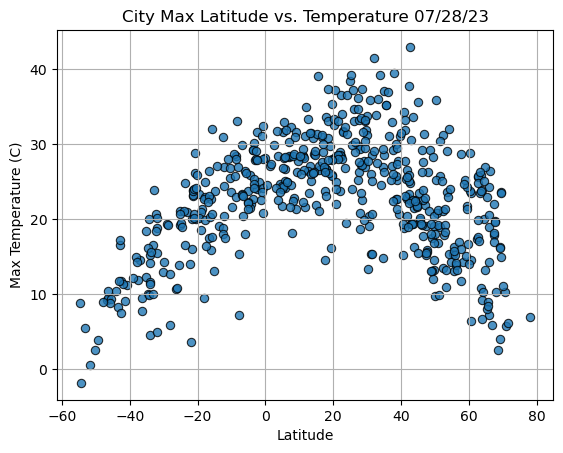

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
lng = city_data_df["Lng"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat,
            max_temp,
            edgecolor ="black",
            linewidths=0.8,
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

plt.title(f"City Max Latitude vs. Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png") 

# Show plot
plt.show()

#### Latitude Vs. Humidity

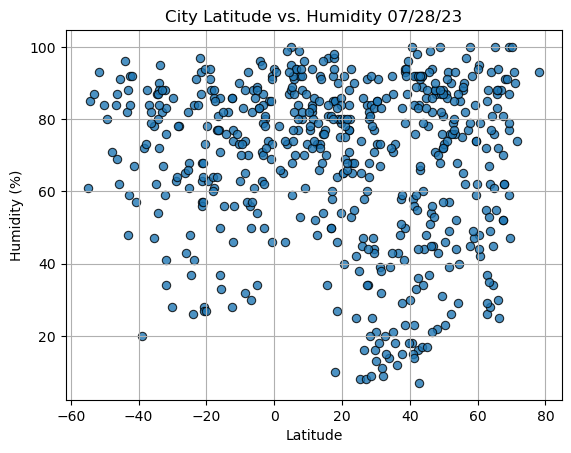

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat,
            humidity,
            edgecolor ="black",
            linewidths=0.8,
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

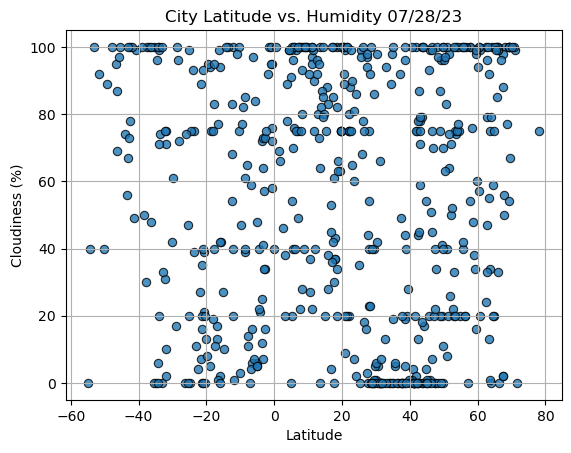

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat,
            cloudiness,
            edgecolor ="black",
            linewidths=0.8,
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

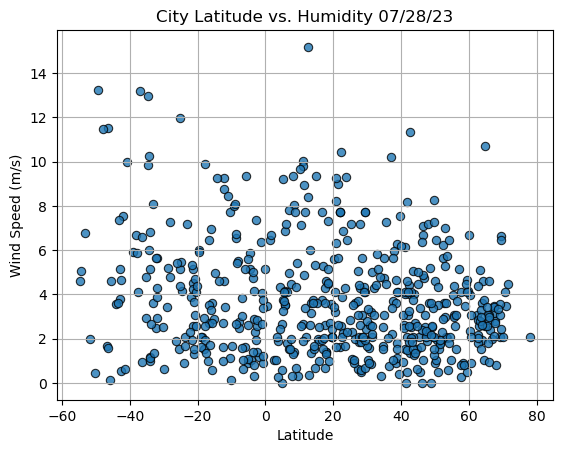

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat,
            wind,
            edgecolor ="black",
            linewidths=0.8,
            marker = "o", 
            alpha = 0.8, 
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, y_label, annotate_pos):
    
    # Perform linear regression
    (slope, intercept, r, p, stderr) = linregress(x, y)
    regression = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # Scatterplot and regression line
    plt.scatter(x, y)
    plt.plot(x, regression, "r")

    # Annotate text
    plt.annotate(line_eq, annotate_pos, fontsize=12, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

    print(f"R value is {r}")
    print(f"P value is {p}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rongelap,11.1635,166.8941,28.43,82,97,10.04,MH,1690609746
2,dehri,24.8667,84.1833,38.42,38,35,2.86,IN,1690609746
5,singtam,27.2333,88.5000,29.70,84,97,0.65,IN,1690609681
7,muravlenko,63.7898,74.5230,23.83,49,34,1.92,RU,1690609748
8,klyuchi,52.2667,79.1667,31.19,26,71,5.63,RU,1690609749


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wewak,-3.5534,143.6268,29.15,71,72,4.76,PG,1690609745
3,grytviken,-54.2811,-36.5092,-1.84,85,40,5.08,GS,1690609747
4,port-aux-francais,-49.3500,70.2167,3.84,80,89,13.26,TF,1690609560
6,lusambo,-4.9667,23.4500,23.70,34,6,0.91,CD,1690609748
9,huamachuco,-7.8000,-78.0667,7.22,93,11,2.75,PE,1690609749


###  Temperature vs. Latitude Linear Regression Plot

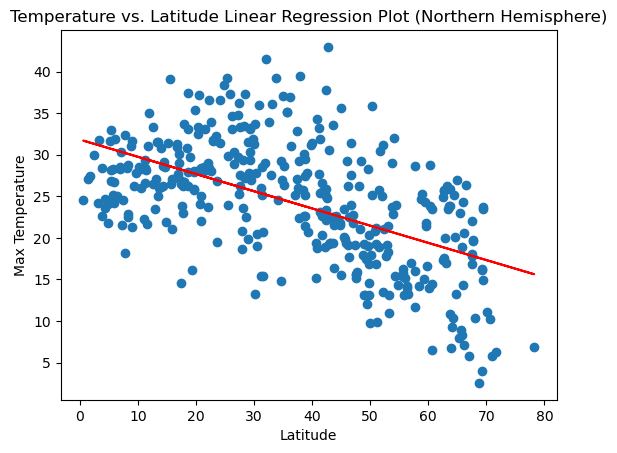

R value is -0.5501477432106188
P value is 4.465212024349949e-32


In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

plot_linear_regression(x, y, 
                       "Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)", 
                       "Max Temperature", (5, -10))

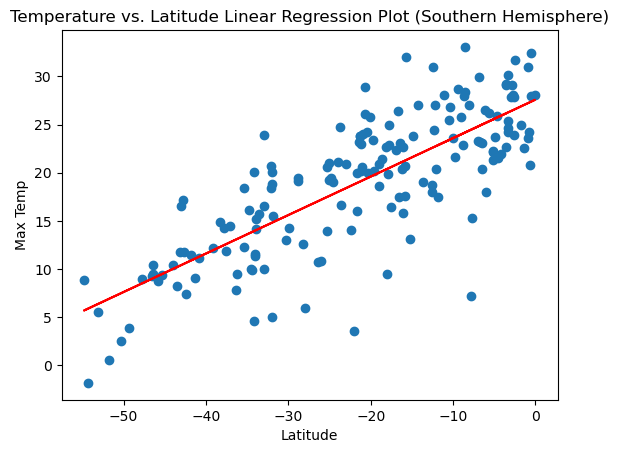

R value is 0.7873917676623924
P value is 1.691435176595981e-36


In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

plot_linear_regression(x, y,
                       "Temperature vs. Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Max Temp",(-50,35))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression analysis of temperature versus latitude reveals strong and statistically significant correlations. In the Northern Hemisphere, there is a strong negative correlation between latitude and temperature ("r" = -0.574, "p" < 0.001), indicating that temperatures tend to decrease with increasing latitude. In the Southern Hemisphere, a strong positive correlation ("r" = 0.75, "p" < 0.001) indicates that temperatures tend to rise as one travels away from the equator and towards higher latitudes. These results demonstrate the substantial influence of latitude on temperature variations in both hemispheres. In the Northern Hemisphere, higher latitudes encounter colder temperatures, whereas in the Southern Hemisphere, higher latitudes have warmer temperatures.

### Humidity vs. Latitude Linear Regression Plot

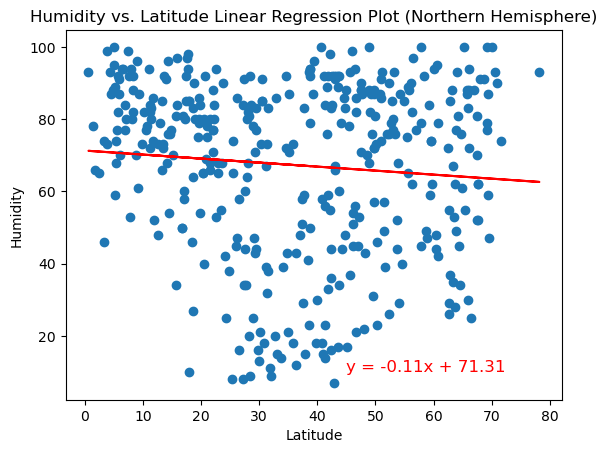

R value is -0.08858677965928687
P value is 0.08137643447287192


In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

plot_linear_regression(x, y, 
                       "Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Humidity",(45,10))

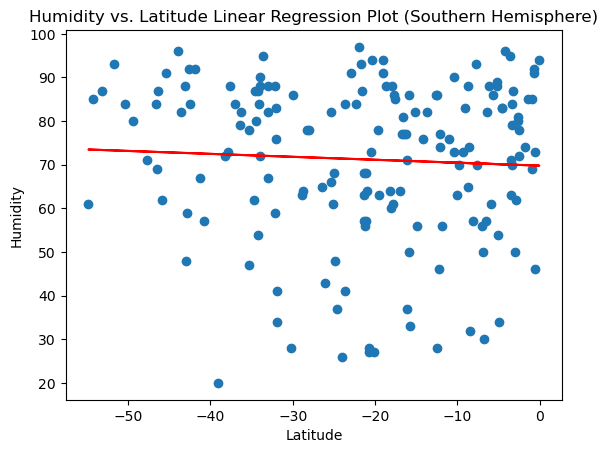

R value is -0.053359876015004123
P value is 0.4934256732559693


In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

plot_linear_regression(x, y, 
                       "Humidity vs. Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Humidity",(-50,-20))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression analysis for humidity versus latitude reveals faint and statistically insignificant correlations. There is a slight decreasing trend in humidity with increasing latitude in the Northern Hemisphere, but the effect is minimal, and the R value of -0.054 indicates a very faint negative correlation. Similarly, there is a negligible positive correlation between humidity and latitude in the Southern Hemisphere ("r" value = 0.031). However, the "p" values (0.300 for the Northern Hemisphere and 0.683 for the Southern Hemisphere) indicate that these relationships are not statistically significant at the 5% level, indicating that latitude alone is not a reliable predictor of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

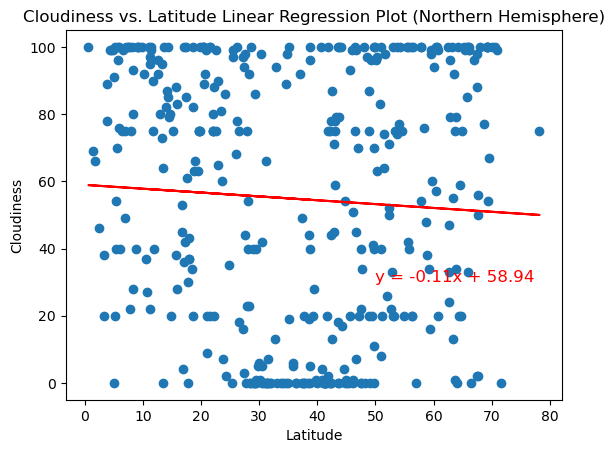

R value is -0.0577065045063997
P value is 0.2568096376885554


In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

plot_linear_regression(x, y,  
                       "Cloudiness vs. Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Cloudiness",(50,30))

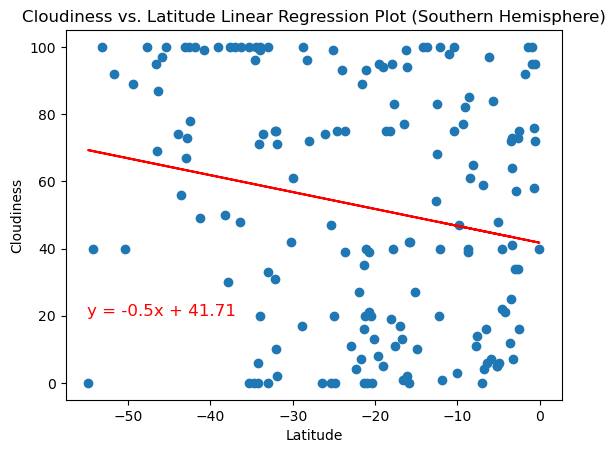

R value is -0.2001635180315999
P value is 0.009498912858586244


In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

plot_linear_regression(x, y,  
                       "Cloudiness vs. Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Cloudiness",(-55,20))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the analysis of cloudiness versus latitude reveals weakly negative correlations. As latitude increases in the Northern Hemisphere, cloudiness decreases slightly but statistically significantly (y = -0.23x + 63.33, "r" = -0.116, "p" = 0.026), indicating that higher latitudes experience slightly less cloud coverage on average. In the Southern Hemisphere, cloudiness demonstrates a more pronounced but marginally significant decrease with increasing latitude (y = -0.4x + 45.57, "r" = -0.149, "p" = 0.046). Despite the fact that latitude appears to influence cloudiness patterns in both hemispheres, the correlations are feeble, suggesting that other factors such as seasonal variations, wind patterns, and geographical characteristics likely play more significant roles in determining cloud coverage.

### Wind Speed vs. Latitude Linear Regression Plot

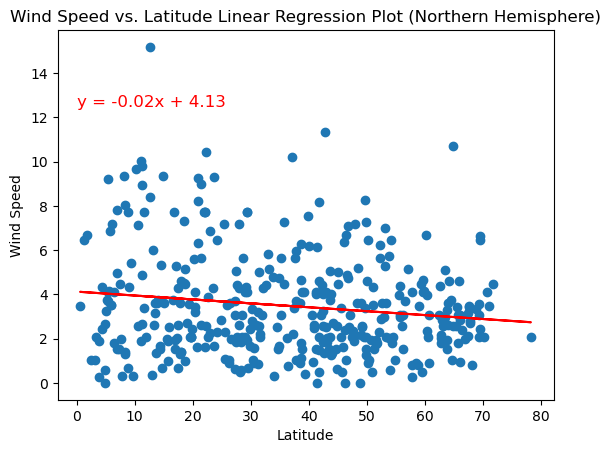

R value is -0.1462238747814797
P value is 0.003895361542340579


In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

plot_linear_regression(x, y, 
                       "Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Wind Speed",(0,12.5))

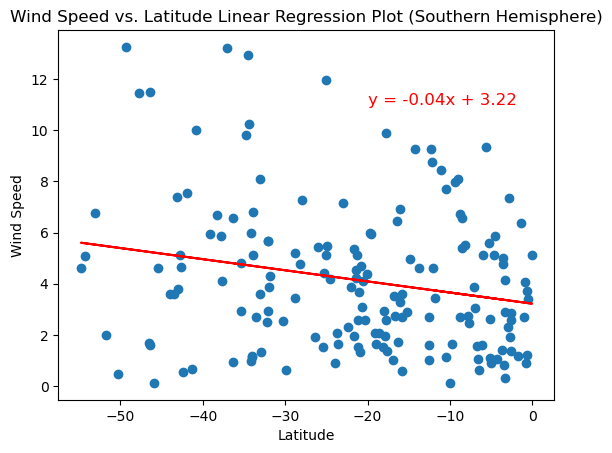

R value is -0.21802858227604008
P value is 0.004647213592379365


In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

plot_linear_regression(x, y, 
                       "Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Wind Speed",(-20,11))

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the linear regression analysis between wind speed and latitude reveals distinct patterns. In the Northern Hemisphere, there is a weak but statistically significant negative correlation between wind speed and latitude ("r" = -0.153, "p" = 0.003), indicating that wind speed tends to decrease slightly as latitude increases. In the Southern Hemisphere, however, the negative correlation is more pronounced and highly significant ("r" = -0.317, "p" = 1.525e-05), indicating that wind speed decreases with increasing latitude. These findings suggest that latitude influences wind speed patterns in both hemispheres, with higher latitudes experiencing, on average, lower wind velocities. 